# TP3 – Méthode d’Uzawa (Méthode des multiplicateurs de Lagrange)

## 1. Problème
Minimiser $f(x,y)=x^2+y^2$ sous $g(x,y)=x+y-1=0$. <br>


## Méthode d'Uzawa (cas contrainte d'égalité)

On considère le problème :

$$
\min_{x \in \mathbb{R}^d} f(x) \quad \text{sous} \quad g(x)=0
$$

On définit le Lagrangien :

$$
L(x,\lambda)=f(x)+\lambda g(x)
$$

L'algorithme d'Uzawa s'écrit :

$$
\begin{cases}
x^{(n)} = \arg\min_x L(x,\lambda^{(n)}) \\
\lambda^{(n+1)} = \lambda^{(n)} + \tau\, g(x^{(n)})
\end{cases}
$$

où $\tau>0$ est un pas fixe.


### Application au problème

On a :

-  $f$ fortement convexe.
-  $g$ convexe (affine)
$$
L(x,y,\lambda)=x^2+y^2+\lambda(x+y-1)
$$

Minimisation en $(x,y)$ :

$$
\nabla_{(x,y)}L = (2x+\lambda,\ 2y+\lambda)
\Rightarrow x^{(n)}=y^{(n)}=-\frac{\lambda^{(n)}}{2}
$$
---

Mise à jour du multiplicateur :

$$
\lambda^{(n+1)}=\lambda^{(n)}+\tau(x^{(n)}+y^{(n)}-1)
$$

Donc :

$$
\lambda^{(n+1)}
= \lambda^{(n)}+\tau\left(-\lambda^{(n)} - 1\right)
= (1-\tau)\lambda^{(n)} - \tau
$$

Point fixe :

$$
\lambda^ * = -1
\quad \Rightarrow \quad
x^* = y^* = \frac{1}{2}
$$
---


### Calcul de \(m\)

$$
f(x,y)=x^2+y^2
\Rightarrow \nabla^2 f =
\begin{pmatrix}
2 & 0 \\
0 & 2
\end{pmatrix}
$$

Donc $$m = 2$$

---

### Calcul de \(c\)

$$
g(x,y)=x+y-1
\Rightarrow \nabla g = (1,1)
$$

donc

$$
c = \|\nabla g\| = \sqrt{1^2+1^2} = \sqrt{2}
$$

---

### Intervalle de convergence pour 

$$
0 < \tau < \frac{2m}{c^2}
= \frac{2 \cdot 2}{(\sqrt{2})^2}
= \frac{4}{2}
= 2
$$

Donc :

$$
\boxed{0 < \tau < 2}
$$

Alors, en prenant $0 < \tau < 2$, La suite générée par l'algorithme d'Uzawa converge vers $X^*$, l'unique solution de $f(X^*) = Min\{f(X)\}$. 

## 2. Algorithme d’Uzawa
Cas contrainte égalité.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Fonctions du problème

In [2]:
def grad_f(X):
    return np.array([2*X[0], 2*X[1]])

def g(X):
    return X[0] + X[1] - 1

## Algorithme d’Uzawa

In [24]:
def UZAWA(f_grad, g, X0, tau, rho, Nmax, eps):
    X = X0.copy()
    lam = 0.0
    hist = [x.copy()]

    for n in range(Nmax):
        gradL = f_grad(X) + lam * np.array([1.0, 1.0])
        X_new = X - tau * gradL
        lam_new = lam + rho * g(X_new)

        if np.linalg.norm(X_new - X) < eps and abs(g(X_new)) < eps:
            break

        X = X_new
        lam = lam_new
        hist.append((x.copy()))

    return X, lam, np.array(hist)

## Exécution numérique

In [25]:
X0 = np.array([2.0, -1.0])
tau = 0.1
rho = 0.5
Nmax = 500
eps = 1e-6

X_star, lambda_star, hist = UZAWA(grad_f, g, X0, tau, rho, Nmax, eps)

X_star, lambda_star

(array([0.49999923, 0.49999923]), -1.0000050553913806)

## Visualisation des Résultats

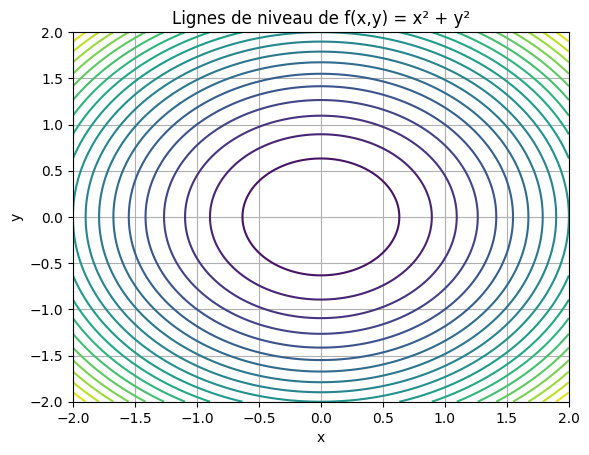

In [ ]:
# Fonction f pour le tracé
def f(X, Y):
    return X**2 + Y**2

# Grille
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
Xg, Yg = np.meshgrid(x, y)
Z = f(Xg, Yg)

plt.figure()
plt.contour(Xg, Yg, Z, levels=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lignes de niveau de f(x,y) = x² + y²")
plt.grid()
plt.show()

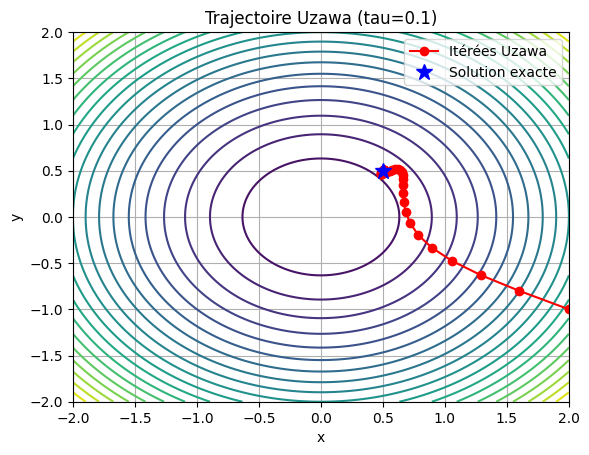

In [ ]:
X0 = np.array([2.0, -1.0])
tau = 0.5
rho = 0.5

X_star, lambda_star, hist = UZAWA(
    grad_f, g, X0, tau, rho, Nmax=500, eps=1e-6
)

# Tracé
plt.figure()
plt.contour(Xg, Yg, Z, levels=20)
plt.plot(hist[:,0], hist[:,1], 'ro-', label="Itérées Uzawa")
plt.plot(0.5, 0.5, 'b*', markersize=12, label="Solution exacte")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Trajectoire Uzawa (tau={tau})")
plt.grid()
plt.show()

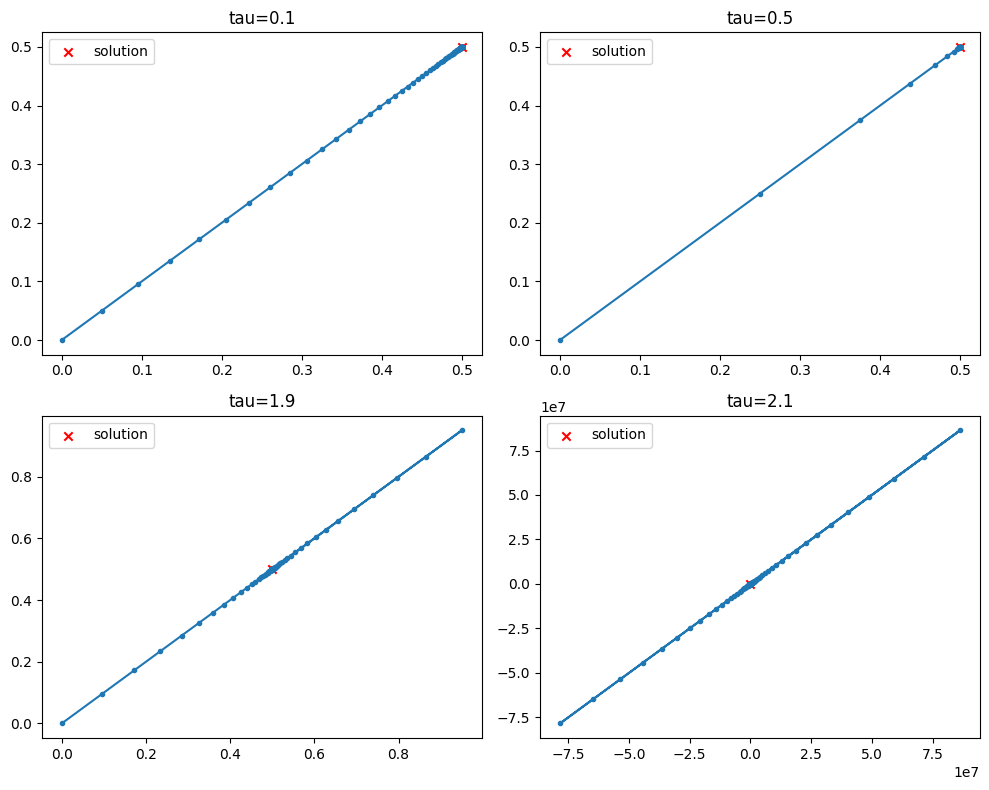

In [ ]:

fig, axs = plt.subplots(2,2,figsize=(10,8))
axs = axs.ravel()
for i,tau in enumerate(taus):
    H = results[tau]
    axs[i].plot(H[:,0],H[:,1],'-o',ms=3)
    axs[i].scatter([0.5],[0.5],c='r',marker='x',label='solution')
    axs[i].set_title(f"tau={tau}"); axs[i].legend()
plt.tight_layout(); plt.show()


# Interprétation des résultats
## Cas τ = 0.1

- convergence lente <br>

- pas très petits <br>

- trajectoire régulière <br>

Conforme à la théorie <br>
0<τ<2



## Cas τ = 0.5

- convergence rapide <br>

- pas d’oscillation <br>

- trajectoire régulière <br>

Conforme à la théorie <br>
0<τ<2





## Cas τ = 1.9

- oscillations marquées

- amortissement lent

Proche de la limite théorique

## Cas τ = 2.1

- divergence explosive numérique

- $x,y,λ→∞$

Instabilité car τ dépasse la borne 2

# Conclusion théorie ↔ numérique

La théorie donne :
0<τ<2

Les expériences confirment :

τ	Comportement
0.5	Convergent rapide
1.5	Convergent oscillant
1.9	Convergent limite
2.1	Divergence
Donc Uzawa est une méthode sensible au choix du pas.

## Recherche du tau optimal

In [ ]:
def nb_iterations(tau, rho=0.5):
    _, _, hist = UZAWA(
        grad_f, g, X0, tau, rho, Nmax=500, eps=1e-6
    )
    return len(hist)

taus = np.linspace(0.01, 2, 30)
iters = [nb_iterations(t) for t in taus]

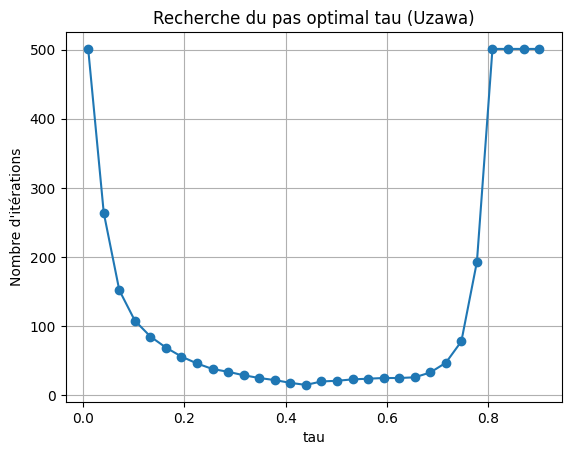

In [18]:

plt.figure()
plt.plot(taus, iters, 'o-')
plt.xlabel("tau")
plt.ylabel("Nombre d'itérations")
plt.title("Recherche du pas optimal tau (Uzawa)")
plt.grid()
plt.show()

In [19]:
tau_opt = taus[np.argmin(iters)]
tau_opt

0.43965517241379315